# Lab IV: Linear Models

### Q0
1. What makes a model “linear”? “Linear” in what?
   a model is linear if it's linear in its parameters, which can be expressed in the y = a + bx form
2. How do you interpret the coefficient for a dummy/ one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.
3. Can linear regression be used for classification? Explain why, or why not.
4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?
6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

### Q1

In [1]:
import pandas as pd

nyc_data = pd.read_csv('/workspaces/DS-3021/data/Q1_clean.csv')

print(nyc_data.head())

   Price  Review Scores Rating Neighbourhood  Property Type        Room Type
0    549                  96.0      Manhattan     Apartment     Private room
1    149                 100.0       Brooklyn     Apartment  Entire home/apt
2    250                 100.0      Manhattan     Apartment  Entire home/apt
3     90                  94.0       Brooklyn     Apartment     Private room
4    270                  90.0      Manhattan     Apartment  Entire home/apt


In [5]:
print(nyc_data.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


#### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

In [6]:
# Group by 'Neighborhood' and calculate mean price and review scores
neighborhood_stats = nyc_data.groupby('Neighbourhood ').agg({
    'Price': 'mean',
    'Review Scores Rating': 'mean'
}).reset_index()

# Rename columns for clarity
neighborhood_stats.columns = ['Neighbourhood ', 'Average Price', 'Average Review Score']

print(neighborhood_stats)


  Neighbourhood   Average Price  Average Review Score
0          Bronx      75.276498             91.654378
1       Brooklyn     127.747378             92.363497
2      Manhattan     183.664286             91.801496
3         Queens      96.857233             91.549057
4  Staten Island     146.166667             90.843750


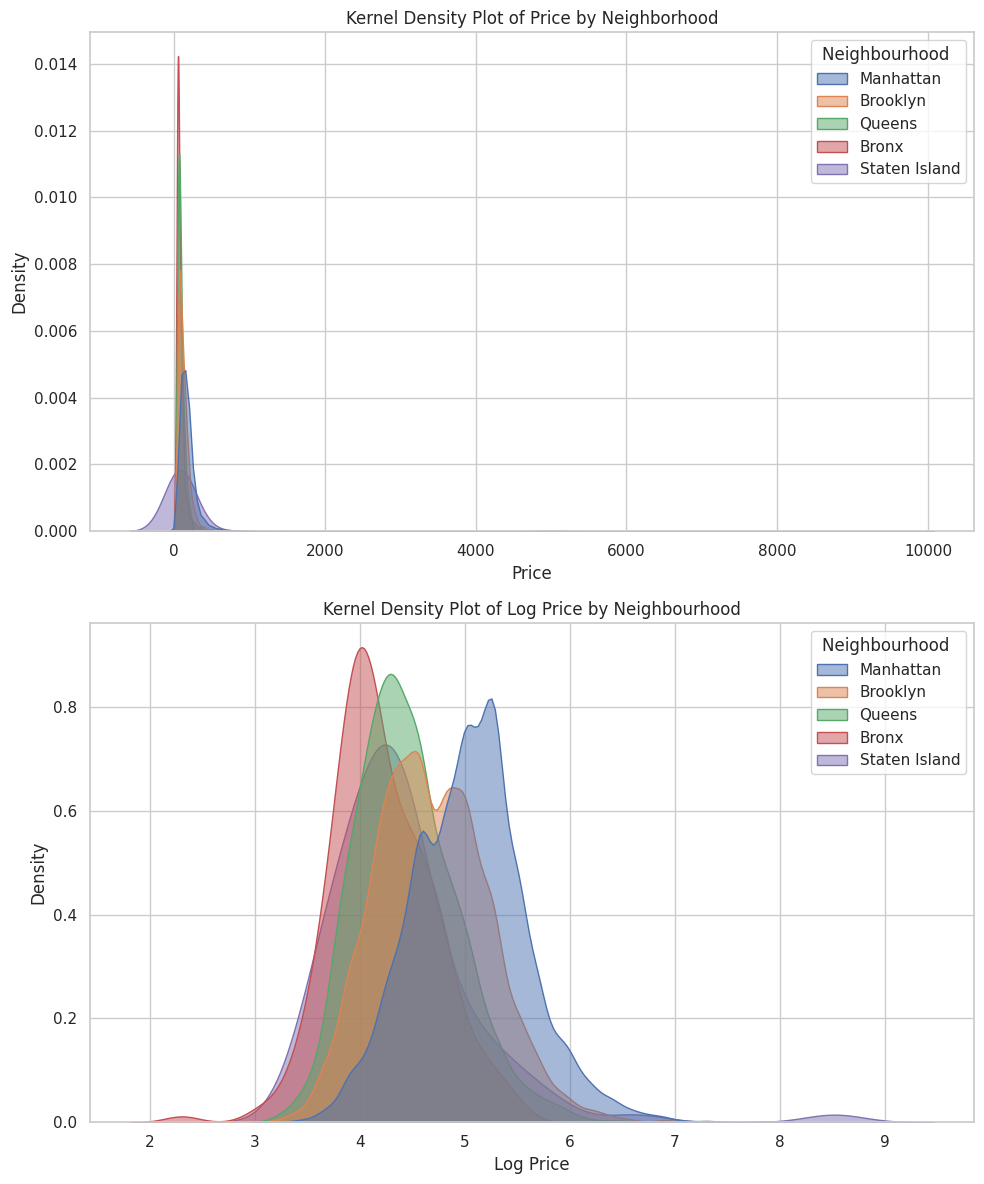

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Add a log-transformed price column
nyc_data['Log Price'] = np.log(nyc_data['Price'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Kernel density plot for Price
sns.kdeplot(data=nyc_data, x="Price", hue="Neighbourhood ", fill=True, common_norm=False, alpha=0.5, ax=axes[0])
axes[0].set_title('Kernel Density Plot of Price by Neighborhood')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

# Kernel density plot for Log Price
sns.kdeplot(data=nyc_data, x="Log Price", hue="Neighbourhood ", fill=True, common_norm=False, alpha=0.5, ax=axes[1])
axes[1].set_title('Kernel Density Plot of Log Price by Neighbourhood')
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


#### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
import statsmodels.api as sm

# Create dummy variables for Neighborhood without dropping the first category
neighborhood_dummies = pd.get_dummies(data['Neighborhood'], drop_first=False)

# Fit the model without an intercept
model_no_intercept = sm.OLS(data['Price'], neighborhood_dummies).fit()

print(model_no_intercept.summary())
